In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize


'line_segments.svg'

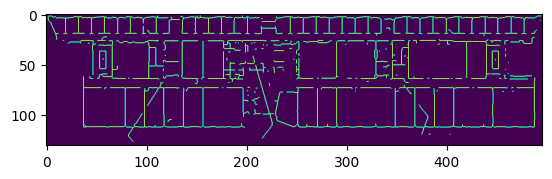

In [23]:
# Function to merge nearly overlapping lines representing the same wall
def merge_lines(lines, merge_threshold=5, angle_threshold=np.deg2rad(10)):
    # """
    # Merge lines that are close to each other and roughly parallel.

    # :param lines: Detected lines in the form of (x1, y1, x2, y2).
    # :param merge_threshold: Distance threshold to consider lines for merging.
    # :param angle_threshold: Angle threshold to consider lines as parallel (in radians).
    # :return: Merged lines.
    # """
    # if not lines:
    #     return []

    # # Helper function to calculate the angle of a line
    # def line_angle(line):
    #     return np.arctan2(line[3] - line[1], line[2] - line[0])

    # # Helper function to calculate distance between two points
    # def point_distance(x1, y1, x2, y2):
    #     return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # # Helper function to calculate the minimum distance between two lines
    # def line_distance(l1, l2):
    #     # Points of the first line
    #     x1, y1, x2, y2 = l1
    #     # Points of the second line
    #     x3, y3, x4, y4 = l2

    #     # Calculate distances from each endpoint of l2 to l1
    #     distances = [point_distance(x1, y1, x3, y3), point_distance(x1, y1, x4, y4),
    #                  point_distance(x2, y2, x3, y3), point_distance(x2, y2, x4, y4)]

    #     return min(distances)

    # # Initialize merged lines list
    # merged_lines = []
    # used_indices = set()

    # for i, line1 in enumerate(lines):
    #     if i in used_indices:
    #         continue

    #     # Find a line to merge with
    #     for j, line2 in enumerate(lines):
    #         if i != j and j not in used_indices:
    #             # Check if lines are close enough and roughly parallel
    #             if (line_distance(line1, line2) < merge_threshold and
    #                 abs(line_angle(line1) - line_angle(line2)) < angle_threshold):

    #                 # Merge lines by averaging their endpoints
    #                 merged_line = [(line1[0] + line2[0]) / 2, (line1[1] + line2[1]) / 2,
    #                                (line1[2] + line2[2]) / 2, (line1[3] + line2[3]) / 2]
    #                 merged_lines.append(merged_line)

    #                 # Mark indices as used
    #                 used_indices.add(i)
    #                 used_indices.add(j)
    #                 break
    #     else:
    #         # If no merge partner found, keep the original line
    #         if i not in used_indices:
    #             merged_lines.append(line1)

    # return merged_lines
    return lines

# Read gray image
# img = cv2.imread("originaldfp_E2_3.png", cv2.IMREAD_GRAYSCALE)
img = cv2.imread("SkeletonTrace/skeleton.png", cv2.IMREAD_GRAYSCALE)

plt.figure()
plt.imshow(img)


# Create default parametrization LSD
lsd = cv2.createLineSegmentDetector(0)

# Detect lines in the image
lines = lsd.detect(img)[0]  # Position 0 of the returned tuple are the detected lines

# Create a DataFrame to hold line segment data
line_segments = []

# Populate DataFrame
for line in lines:
    x1, y1, x2, y2 = line[0]
    line_segments.append([x1, y1, x2, y2])

# Now we will call the merge_lines function to merge the detected lines
merged_line_segments = merge_lines(line_segments)

# Function to generate SVG content from line segments
def generate_svg_content(line_segments):
    svg_content = '<svg width="1600" height="400" xmlns="http://www.w3.org/2000/svg">\n'
    for line in line_segments:
        x1, y1, x2, y2 = line
        svg_content += f'<line x1="{x1}" y1="{y1}" x2="{x2}" y2="{y2}" stroke="black" stroke-width="2"/>\n'
    svg_content += '</svg>'
    return svg_content

# Generate SVG content with the merged lines
svg_data = generate_svg_content(merged_line_segments)

# Save to SVG file
svg_file_path = 'line_segments.svg'
with open(svg_file_path, 'w') as file:
    file.write(svg_data)

# Return the path to the saved SVG file
svg_file_path
